<h1>Pandas</h1>

In [ ]:
#installing pandas libraries
#!pip install pandas-datareader
#!pip install --upgrade html5lib==1.0b8

#There is a bug in the latest version of html5lib so install an earlier version
#Restart kernel after installing html5lib

<h2>Imports</h2>

In [1]:
import pandas as pd #pandas library
from pandas_datareader import data #data readers (google, html, etc.)
#The following line ensures that graphs are rendered in the notebook
%matplotlib inline 
import numpy as np
import matplotlib.pyplot as plt #Plotting library
import datetime as dt #datetime for timeseries support

<h2>The structure of a dataframe</h2>

In [10]:
pd.DataFrame([[1,2,3],[1,2,3]],columns=['A','B','C'])

,A,B,C
0,1,2,3
1,1,2,3


<h3>Accessing columns and rows</h3>

In [11]:
df = pd.DataFrame([['r1','00','01','02'],['r2','10','11','12'],['r3','20','21','22']],columns=['row_label','A','B','C'])
print(id(df))
df.set_index('row_label',inplace=True)
print(id(df))
df

4623016400
4623016400


,A,B,C
row_label,,,
r1,00,01,02
r2,10,11,12
r3,20,21,22


<h3>Getting column data</h3>

In [12]:
df['B']

row_label
r1    01
r2    11
r3    21
Name: B, dtype: object

<h3>Getting row data</h3>

In [13]:
df.loc['r1']

A    00
B    01
C    02
Name: r1, dtype: object

In [8]:
df.iloc[2]

Currency      GBP-USD
Value          1.2976
Change        -0.0028
Net Change     -0.22%
Time (EDT)    1:06 PM
2 Day             NaN
Name: 2, dtype: object

<h3>Getting a row by row number</h3>

In [ ]:
df.iloc[0]

<h3>Getting multiple columns<h3>

In [16]:
df[['B','A']] #Note that the column identifiers are in a list

,B,A
row_label,,
r1,01,00
r2,11,10
r3,21,20


<h3>Getting a specific cell</h3>

In [ ]:
df.loc['r2','B']

In [ ]:
df.loc['r2']['A']

<h3>Slicing</h3>

In [ ]:
df.loc['r1':'r2']

In [ ]:
df.loc['r1':'r2','B':'C']

<h2>Pandas datareader</h2>
<li>Access data from html tables on any web page</li>
<li>Get data from google finance</li>
<li>Get data from the federal reserve</li>

<h3>HTML Tables</h3>
<li>Pandas datareader can read a table in an html page into a dataframe
<li>the read_html function returns a list of all dataframes with one dataframe for each html table on the page

<h4>Example: Read the tables on the google finance page</h4>

In [5]:
df_list = pd.read_html('http://www.bloomberg.com/markets/currencies/major')
print(len(df_list))

1


<h4>The page contains only one table so the read_html function returns a list of one element</h4>

In [6]:
df = df_list[0]
print(df)

   Currency      Value  Change Net Change Time (EDT)  2 Day
0   EUR-USD     1.1755 -0.0004     -0.03%    1:06 PM    NaN
1   USD-JPY   109.3000 -0.7700     -0.70%    1:06 PM    NaN
2   GBP-USD     1.2976 -0.0028     -0.22%    1:06 PM    NaN
3   AUD-USD     0.7885 -0.0003     -0.04%    1:06 PM    NaN
4   USD-CAD     1.2721  0.0021     +0.17%    1:06 PM    NaN
5   USD-CHF     0.9640  0.0003     +0.03%    1:06 PM    NaN
6   EUR-JPY   128.4900 -0.9600     -0.74%    1:06 PM    NaN
7   EUR-GBP     0.9060  0.0017     +0.19%    1:06 PM    NaN
8   USD-HKD     7.8174  0.0023     +0.03%    1:06 PM    NaN
9   EUR-CHF     1.1334  0.0002     +0.02%    1:06 PM    NaN
10  USD-KRW  1141.7800  6.6000     +0.58%    2:29 AM    NaN


<h4>Note that the read_html function has automatically detected the header columns</h4>
<h4>If an index is necessary, we need to explicitly specify it</h4>

In [ ]:
df.set_index('Currency',inplace=True)
print(df)

<h4>Now we can use .loc to extract specific currency rates</h4>

In [ ]:
df.loc['EUR-CHF','Value']

<h3>Working with views and copies</h3>

<h4>Chained indexing creates a copy and changes to the copy won't be reflected in the original dataframe</h4>

In [21]:
eur_usd = df.loc['EUR-USD']['Change'] #This is chained indexing
df.loc['EUR-USD']['Change'] = 1.0 #Here we are changing a value in a copy of the dataframe
print(eur_usd)
print(df.loc['EUR-USD']['Change']) #Neither eur_usd, nor the dataframe are changed

KeyError: 'the label [EUR-USD] is not in the [index]'

In [22]:
eur_usd = df.loc['EUR-USD','Change'] #eur_usd points to the value inside the dataframe
df.loc['EUR-USD','Change'] = 1.0 #Change the value in the view 
print(eur_usd) #eur_usd is changed (because it points to the view)
print(df.loc['EUR-USD']['Change']) #The dataframe has been correctly updated

KeyError: 'the label [EUR-USD] is not in the [index]'

<h2>Getting historical stock prices from Google financs</h2>
Usage: DataReader(ticker,source,startdate,enddate)<br>
Unfortunately, the Yahoo finance datareader has stopped working because of a change to Yahoo's website


In [23]:
from pandas_datareader import data
import datetime as dt
start=dt.datetime(2017, 1, 1)
end=dt.datetime.today()


print(start,end)


df = data.DataReader('IBM', 'google', start, end)


2017-01-01 00:00:00 2017-08-10 12:52:45.686767


In [ ]:
df

<h2>Datareader documentation</h2>
http://pandas-datareader.readthedocs.io/en/latest/</h2>

<h3>Working with a timeseries data frame</h3>
<li>The data is organized by time with the index serving as the timeline


<h4>Creating new columns</h4>
<li>Add a column to a dataframe
<li>Base the elements of the column on some combination of data in the existing columns
<h4>Example: Number of Days that the stock closed higher than it opened
<li>We'll create a new column with the header "UP"
<li>And use np.where to decide what to put in the column

In [18]:
df['UP']=np.where(df['Close']>df['Open'],1,0)
df

,Open,High,Low,Close,Volume,UP
Date,,,,,,
2017-01-03,167.00,167.87,166.01,167.19,2934299,1
2017-01-04,167.77,169.87,167.36,169.26,3381432,1
2017-01-05,169.25,169.39,167.26,168.70,2682301,0
2017-01-06,168.69,169.92,167.52,169.53,2945536,1
2017-01-09,169.47,169.80,167.62,167.65,3189891,0
2017-01-10,167.98,168.09,165.34,165.52,4118694,0
2017-01-11,166.05,167.76,165.60,167.75,3599464,1
2017-01-12,167.77,168.01,165.56,167.95,2927973,1
2017-01-13,167.97,168.48,166.88,167.34,2875433,0


<h3>Get summary statistics</h3>
<li>The "describe" function returns a dataframe containing summary stats for all numerical columns
<li>Columns containing non-numerical data are ignored

In [19]:
df.describe()

,Open,High,Low,Close,Volume,UP
count,151.000000,152.000000,151.000000,152.000000,1.520000e+02,152.000000
mean,163.445828,164.150789,162.545960,163.289408,4.157301e+06,0.473684
std,11.932066,12.102883,11.882041,12.068339,2.164811e+06,0.500958
min,141.750000,142.030000,141.190000,141.770000,1.825048e+06,0.000000
25%,152.980000,153.805000,152.055000,152.992500,3.080186e+06,0.000000
50%,161.760000,162.075000,160.380000,160.570000,3.547950e+06,0.000000
75%,175.000000,175.770000,173.650000,174.630000,4.391170e+06,1.000000
max,182.000000,182.790000,180.920000,181.950000,1.928428e+07,1.000000


<h4>Calculate the percentage of days that the stock has closed higher than its open</h4>

In [20]:
df['UP'].sum()/df['UP'].count()

0.47368421052631576

<h4>Calculate percent changes</h4>
<li>The function pct_change computes a percent change between successive rows (times in  timeseries data)
<li>Defaults to a single time delta
<li>With an argument, the time delta can be changed

In [24]:
df['Close'].pct_change() #One timeperiod percent change

Date
2017-01-03         NaN
2017-01-04    0.012381
2017-01-05   -0.003309
2017-01-06    0.004920
2017-01-09   -0.011089
2017-01-10   -0.012705
2017-01-11    0.013473
2017-01-12    0.001192
2017-01-13   -0.003632
2017-01-17    0.003287
2017-01-18   -0.006492
2017-01-19    0.000060
2017-01-20    0.022421
2017-01-23    0.002814
2017-01-24    0.028475
2017-01-25    0.013587
2017-01-26    0.002075
2017-01-27   -0.007612
2017-01-30   -0.008460
2017-01-31   -0.007281
2017-02-01   -0.001318
2017-02-02    0.001664
2017-02-03    0.007103
2017-02-06    0.000228
2017-02-07    0.014784
2017-02-08   -0.012832
2017-02-09    0.005903
2017-02-10    0.008295
2017-02-13    0.003806
2017-02-14    0.004293
                ...   
2017-06-28    0.003683
2017-06-29   -0.007662
2017-06-30   -0.001946
2017-07-03    0.011376
2017-07-05   -0.012277
2017-07-06   -0.008525
2017-07-07    0.003807
2017-07-10    0.003138
2017-07-11   -0.001499
2017-07-12    0.003329
2017-07-13   -0.000455
2017-07-14    0.003971
2017-0

In [25]:
n=13
df['Close'].pct_change(n) #n timeperiods percent change

Date
2017-01-03         NaN
2017-01-04         NaN
2017-01-05         NaN
2017-01-06         NaN
2017-01-09         NaN
2017-01-10         NaN
2017-01-11         NaN
2017-01-12         NaN
2017-01-13         NaN
2017-01-17         NaN
2017-01-18         NaN
2017-01-19         NaN
2017-01-20         NaN
2017-01-23    0.022968
2017-01-24    0.039230
2017-01-25    0.056846
2017-01-26    0.053855
2017-01-27    0.057560
2017-01-30    0.062107
2017-01-31    0.040358
2017-02-01    0.037749
2017-02-02    0.043265
2017-02-03    0.047233
2017-02-06    0.054317
2017-02-07    0.069840
2017-02-08    0.032952
2017-02-09    0.036134
2017-02-10    0.015804
2017-02-13    0.006001
2017-02-14    0.008228
                ...   
2017-06-28    0.007917
2017-06-29   -0.006766
2017-06-30   -0.002723
2017-07-03    0.011508
2017-07-05   -0.003566
2017-07-06   -0.019436
2017-07-07   -0.012271
2017-07-10   -0.009874
2017-07-11   -0.003901
2017-07-12   -0.004534
2017-07-13   -0.003115
2017-07-14   -0.006378
2017-0

<h3>NaN support</h3>
Pandas functions can ignore NaNs

In [26]:
n=13
df['Close'].pct_change(n).mean()

-0.013283680961303935

<h3>Rolling windows</h3>
<li>"rolling" function extracts rolling windows
<li>For example, the 21 period rolling window of the 13 period percent change 

In [27]:
df['Close'].pct_change(n).rolling(21)

Rolling [window=21,center=False,axis=0]

<h4>Calculate something on the rolling windows</h4>

<h4>Example: mean (the 21 day moving average of the 13 day percent change)

In [28]:
n=13
df['Close'].pct_change(n).rolling(21).mean()

Date
2017-01-03         NaN
2017-01-04         NaN
2017-01-05         NaN
2017-01-06         NaN
2017-01-09         NaN
2017-01-10         NaN
2017-01-11         NaN
2017-01-12         NaN
2017-01-13         NaN
2017-01-17         NaN
2017-01-18         NaN
2017-01-19         NaN
2017-01-20         NaN
2017-01-23         NaN
2017-01-24         NaN
2017-01-25         NaN
2017-01-26         NaN
2017-01-27         NaN
2017-01-30         NaN
2017-01-31         NaN
2017-02-01         NaN
2017-02-02         NaN
2017-02-03         NaN
2017-02-06         NaN
2017-02-07         NaN
2017-02-08         NaN
2017-02-09         NaN
2017-02-10         NaN
2017-02-13         NaN
2017-02-14         NaN
                ...   
2017-06-28    0.011205
2017-06-29    0.010256
2017-06-30    0.009398
2017-07-03    0.009777
2017-07-05    0.010000
2017-07-06    0.008621
2017-07-07    0.007973
2017-07-10    0.007465
2017-07-11    0.006824
2017-07-12    0.005621
2017-07-13    0.004930
2017-07-14    0.004437
2017-0

<h4>Calculate several moving averages and graph them</h4>

In [29]:
ma_8 = df['Close'].pct_change(n).rolling(window=8).mean()
ma_13= df['Close'].pct_change(n).rolling(window=13).mean()
ma_21= df['Close'].pct_change(n).rolling(window=21).mean()
ma_34= df['Close'].pct_change(n).rolling(window=34).mean()
ma_55= df['Close'].pct_change(n).rolling(window=55).mean()

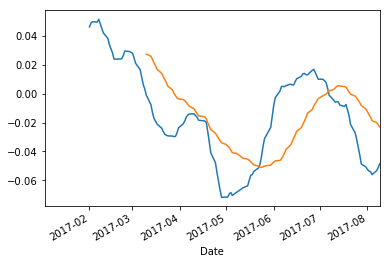

In [30]:
ma_8.plot()
ma_34.plot()

<h2>Linear regression with pandas</h2>
<h4>Example: TAN is the ticker for a solar ETF. FSLR, RGSE, and SCTY are tickers of companies that build or lease solar panels. Each has a different business model. We'll use pandas to study the risk reward tradeoff between the 4 investments and also see how correlated they are</h4>

In [31]:
import datetime
import pandas_datareader as data
start = datetime.datetime(2015,7,1)
end = datetime.datetime(2016,6,1)
solar_df = data.DataReader(['FSLR', 'TAN','RGSE','SCTY'],'google', start=start,end=end)['Close']

In [32]:
solar_df

,FSLR,RGSE,SCTY,TAN
Date,,,,
2015-07-01,46.04,1128.00,52.40,38.84
2015-07-02,45.17,1200.00,52.27,38.55
2015-07-06,44.19,1008.00,51.75,36.37
2015-07-07,45.12,984.00,53.21,36.10
2015-07-08,43.27,852.00,51.48,33.67
2015-07-09,43.65,876.00,51.98,35.23
2015-07-10,44.03,942.00,53.00,36.49
2015-07-13,46.01,978.00,53.39,37.37
2015-07-14,45.81,906.00,54.26,37.86


<h4>Let's calculate returns (the 1 day percent change)</h4>

In [38]:
rets = solar_df.pct_change()
print(rets)

                FSLR      RGSE      SCTY       TAN
Date                                              
2015-07-01       NaN       NaN       NaN       NaN
2015-07-02 -0.018897  0.063830 -0.002481 -0.007467
2015-07-06 -0.021696 -0.160000 -0.009948 -0.056550
2015-07-07  0.021045 -0.023810  0.028213 -0.007424
2015-07-08 -0.041002 -0.134146 -0.032513 -0.067313
2015-07-09  0.008782  0.028169  0.009713  0.046332
2015-07-10  0.008706  0.075342  0.019623  0.035765
2015-07-13  0.044969  0.038217  0.007358  0.024116
2015-07-14 -0.004347 -0.073620  0.016295  0.013112
2015-07-15 -0.028815 -0.019868 -0.031699 -0.021130
2015-07-16  0.006069  0.006757  0.004949  0.012142
2015-07-17 -0.018097  0.006711 -0.012311 -0.000800
2015-07-20 -0.015245 -0.053333  0.069415  0.004803
2015-07-21  0.004621  0.049296  0.007710 -0.015932
2015-07-22 -0.022539  0.033557 -0.014947 -0.011873
2015-07-23  0.005647 -0.025974 -0.030527 -0.020208
2015-07-24  0.005381  0.046667  0.017701 -0.011427
2015-07-27 -0.016290  0.025478 

<h4>Let's visualize the relationship between each stock and the ETF</h4>

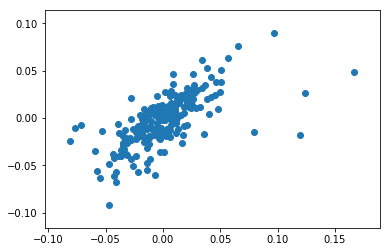

In [34]:
import matplotlib.pyplot as plt
plt.scatter(rets.FSLR,rets.TAN)

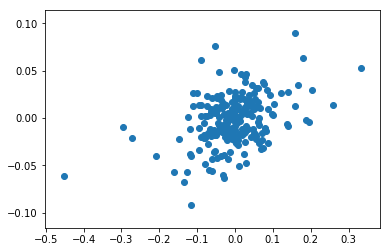

In [35]:
plt.scatter(rets.RGSE,rets.TAN)

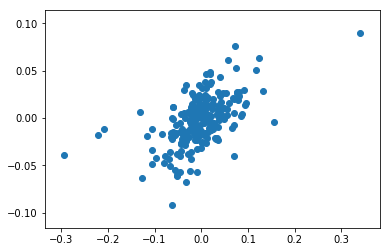

In [36]:
plt.scatter(rets.SCTY,rets.TAN)

<h4>The correlation matrix</h4>

In [39]:
solar_corr = rets.corr()
print(solar_corr)

          FSLR      RGSE      SCTY       TAN
FSLR  1.000000  0.249923  0.272612  0.670114
RGSE  0.249923  1.000000  0.236604  0.389566
SCTY  0.272612  0.236604  1.000000  0.559854
TAN   0.670114  0.389566  0.559854  1.000000


<h3>Basic risk analysis</h3>
<h4>We'll plot the mean and std or returns for each ticker to get a sense of the risk return profile</h4>

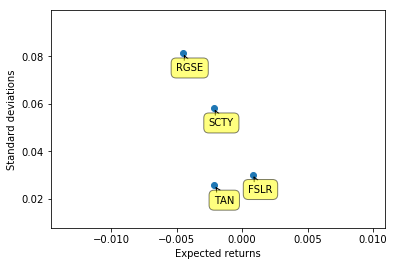

In [40]:
plt.scatter(rets.mean(), rets.std())
plt.xlabel('Expected returns')
plt.ylabel('Standard deviations')
for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (20, -20),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.5),
        arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))
plt.show()


<h2>Regressions</h2>
http://statsmodels.sourceforge.net/

<h3>Steps for regression</h3>
<li>Construct y (dependent variable series)
<li>Construct matrix (dataframe) of X (independent variable series)
<li>Add intercept
<li>Model the regression
<li>Get the results
<h3>The statsmodels library contains various regression packages. We'll use the OLS (Ordinary Least Squares) model

In [ ]:
import numpy as np
import statsmodels.api as sm
X=solar_df[['FSLR','RGSE','SCTY']]
X = sm.add_constant(X)
y=solar_df['TAN']
model = sm.OLS(y,X,missing='drop')
result = model.fit()
print(result.summary())

<h4>Finally plot the fitted line with the actual y values

In [ ]:
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(y)
ax.plot(result.fittedvalues)